In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Discrete dynamical systems - Strange attractors

If you were a STEM major in college, you are probably familiar with *differential equations*. If not – that's ok: they are essentially equations describing some *dynamical* system i.e., some system that changes across time. So they pretty much describe the world around us, and when solved can predict [to a certain extent] things like the weather or planetary orbits. Differential equations generally look like something like this: 

$$ \frac{\mathrm{d}x }{\mathrm{d} t} = x^2 $$

The left hand side is a rate of change of some variable x, represented by some change in x (dx) over change in time (dt) (hence \\( \frac{\mathrm{d}x }{\mathrm{d} t}\\)).  To solve this equation - and hence understand its behavior - we solve for the change (or derivative) of the variable, which is \\({\mathrm{d}x }\\) here. By moving variables around and integrating, our solution would look like \\( x = -\frac{1}{t+c} \\) where c is a constant.

Differential equations like these are continuous - they can theoretically describe the state of the system at infinitesimally small steps in time. These often get very complex when describing real world phenomena, and sometimes are unsolveable.

There are also *discrete* dynamical systems where time steps are discrete, and solving for the system instead relies on recursively solving *difference* equations - the left side of equation is the next step in time, and the right side is how to get to that step based on the current step. For example:

$$ x_{t+1} = x_t + 1 $$

The attractors, or maps, of this design trace out the behavior of the Peter De Jong attractor, elegantly defined by these two equations:

$$ x_{n+1}=sin(a∗y_{n})−cos(b∗x_{n}) $$
 
$$ y_{n+1}=sin(c∗x_{n})−cos(d∗y_{n}) $$

And that's it! The function below calculates these exact equations repeatedly in a loop, and keeps track of the x and y output to plot it at the end. 

Notice how these attractors look grainy, like swirling clouds of dust. That's because these are discrete dynamical systems. Were we solving continuous dynamical systems, the trajectories would be smooth (as a cool example check out the famous [Lorenz attractor](https://www.wikiwand.com/en/Lorenz_system)).

Different configurations of the De Jong attractor's parameters `a, b, c` and `d` yield wildly different - and [chaotic](https://www.wikiwand.com/en/Chaos_theory) - trajectories, so I then iterate over my favorite parametrizations for the final design (I do use some photoshop afterwards for the 3 circles). Play around by changing these parameters yourself and see what cool trajectories you may find!

In [3]:
def dejong_iterator(a, b, c, d, time=100000, init= (0.,0.)):
    xn, yn = init
    x, y  = [xn], [yn]
    for n in range(time):
        x_nxt = np.sin(a*yn) - np.cos(b*xn)
        y_nxt = np.sin(c*xn) - np.cos(d*yn)
        x.append(x_nxt)
        y.append(y_nxt)
        xn, yn = x_nxt, y_nxt
    return x, y

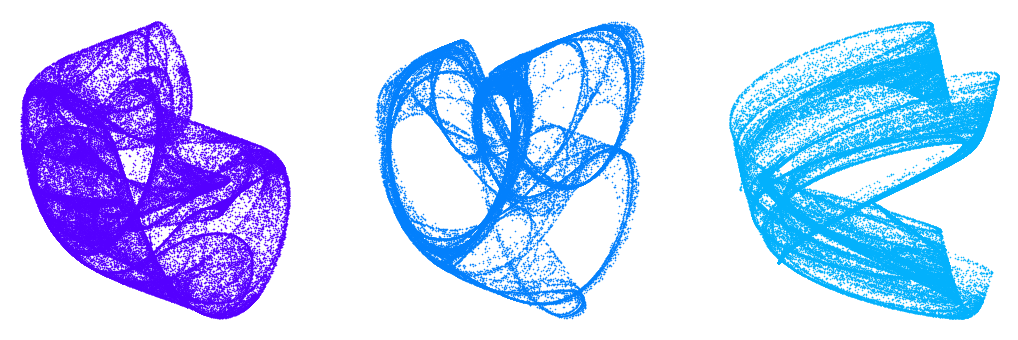

In [20]:
#Different sets of parameters
roll = {'a':2, 'b':1.4, 'c':0.49, 'd':2.68}
sparse = {'a':2, 'b':1.4, 'c':-0.49, 'd':-2.68}
shell = {'a':1.4, 'b':-2.3, 'c':2.4, 'd':-2.2}
stroke = {'a':0.2, 'b':-5, 'c':3, 'd':-1}

plt.figure(figsize=(18,6))
i=1
for params, color in zip([roll,sparse,stroke], ['#5500ff', '#0380fc', '#03b1fc']):
    plt.subplot(1,3,i)
    x,y = dejong_iterator(time=100000, **params)
    plt.scatter(x,y,s=0.3,color=color)
    plt.axis('off')
    i+=1
plt.savefig(fname='./img/dejong', dpi=300)
plt.show()

## Resources/Acknowledgments

- [SIS textbook for cool interactive explanation of strange attractors](http://systems-sciences.uni-graz.at/etextbook/sw2/lorenz.html)
- [List of chaotic maps](https://www.wikiwand.com/en/List_of_chaotic_maps)